In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
all_energies = np.loadtxt('compton/build/data/energy.csv', delimiter=',', skiprows=1)
all_energies[:, 0] = 180 - np.abs(all_energies[:, 0])
all_energies.shape

(93136, 2)

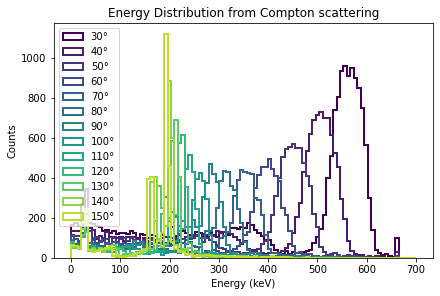

In [28]:
angles = np.unique(all_energies[:, 0])

colors = plt.cm.viridis(np.linspace(0, 0.9, len(angles)))

bins = np.linspace(0, 700, 101)
fig, ax = plt.subplots(layout='constrained')
peaks = np.nan * np.zeros(len(angles))
for i, (color, angle) in enumerate(zip(colors, angles)):        
    energies = all_energies[all_energies[:, 0] == angle, 1]
    values, *_ = ax.hist(energies, bins=bins, label=f'{angle:.0f}°', histtype='step', linewidth=2, color=color)
    with open(f'compton/build/data/energy_{angle:.0f}.csv', 'w') as f:
        np.savetxt(f, values, delimiter=',')
    peaks[i] = bins[np.argmax(values)]
ax.set(xlabel='Energy (keV)', ylabel='Counts', title='Energy Distribution from Compton scattering')
ax.legend(loc='upper left')

[Text(0.5, 0, 'Angle (°)'),
 Text(0, 0.5, 'Peak Energy (keV)'),
 Text(0.5, 1.0, 'Peak Energy vs. Angle')]

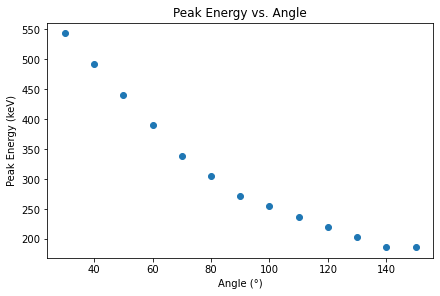

In [10]:
# Plot energy peaks as a function of angle
fig, ax = plt.subplots(layout='constrained')
ax.plot(angles, peaks, 'o')
ax.set(xlabel='Angle (°)', ylabel='Peak Energy (keV)', title='Peak Energy vs. Angle')

Decay activity

In [1]:
import datetime as dt

In [8]:
delta_t = (dt.datetime.now() - dt.datetime(2003, 1, 28)) / dt.timedelta(days=365.25)
delta_t

19.7000093625353

In [15]:
activity = 380e3 * 0.5**(delta_t/30.08)

In [16]:
area_fraction = 2*np.pi*(1-np.cos(np.arctan(0.5/4.5))) / (4*np.pi)

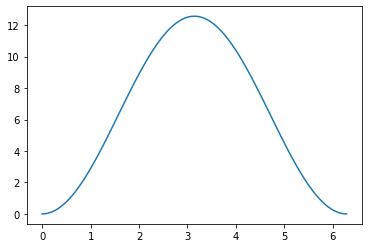

In [31]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(theta, 2*np.pi*(1-np.cos(theta)))

In [30]:
photons_per_second = activity * area_fraction
10_000_000 / photons_per_second / 4 / 3600

0.9409104943439958